In [8]:
pip install seaborn
pip install imblearn
pip install torch


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 86.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 18.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 27.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 68.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 20.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Importing Libraries


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import shap



## Data Information and Statistics

In [10]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)



In [54]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

In [12]:
data.describe(include = 'all')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Exploratory Data Analysis

In [81]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [55]:
data.drop(['customerID'], axis = 1, inplace = True)

In [14]:
Categorical_columns = data.select_dtypes('object').columns
Numerical_columns = data.select_dtypes(['int', 'float']).columns
print(Categorical_columns)
print(Numerical_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [16]:
for column in Categorical_columns:
  print(data[column].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

 ### For columns such as ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], any value labeled as "No internet service" should be treated as "No."

In [56]:
data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace({'No internet service': 'No'})
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})

### The `TotalCharges` column, initially read as a string, needs to be converted to numeric for analysis and modeling purposes. 


In [57]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna(subset=['TotalCharges'])

## Numerical Columns

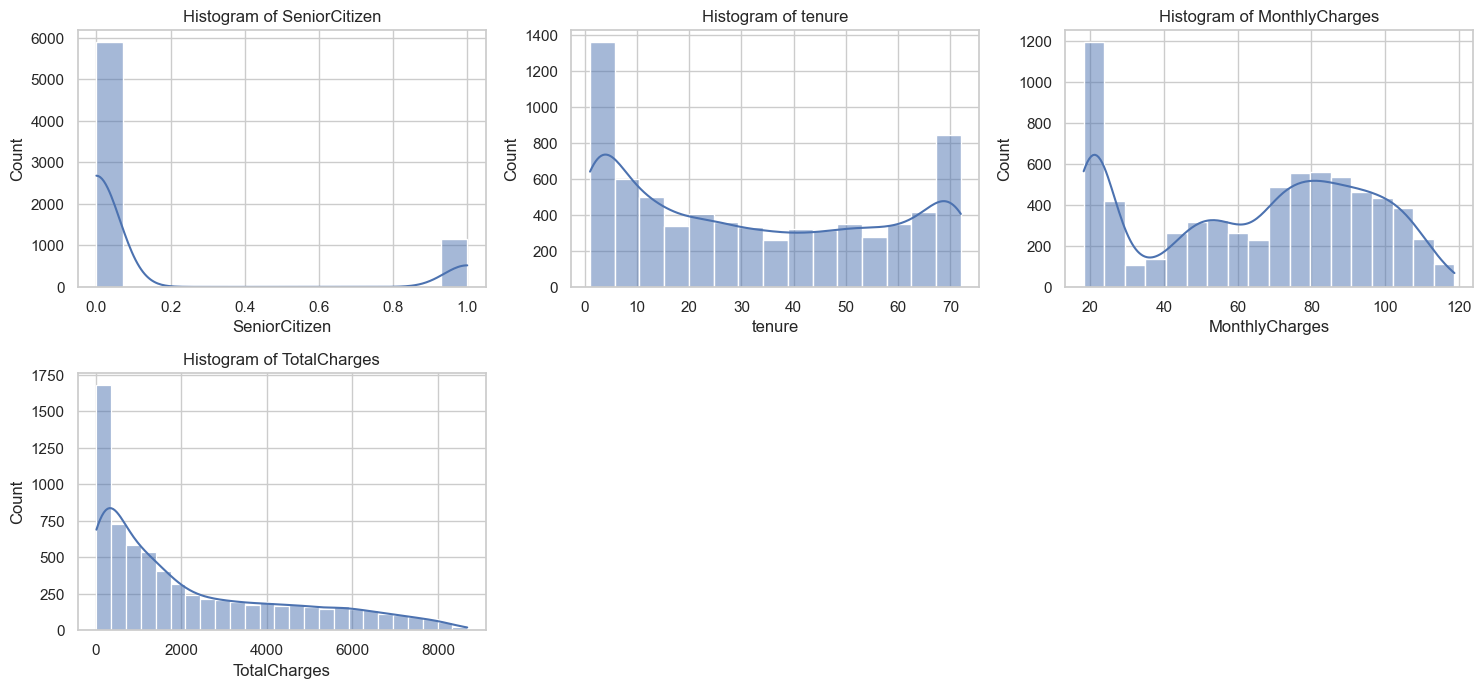

In [19]:
sns.set(style="whitegrid")
Numerical_columns = data.select_dtypes(['int', 'float']).columns
numerical_data = data[Numerical_columns]

# 1. Histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(Numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust rows and columns as needed
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()




## Observations:

* ### Column SeniorCitizen has a mostly uniform distribution or binary pattern, it might work better as a categorical variable, especially if it only takes a few discrete values.

* ### The columns MonthlyCharges and TotalCharges are right-skewed, transformations such as log, square root, or Box-Cox transformations can help make the data more normally distributed.

* ### tenure shows peaks at certain values if customers have specific contract durations. we can create bins like "New", "Short-term", "Mid-term", and "Long-term" to group customers based on loyalty length.

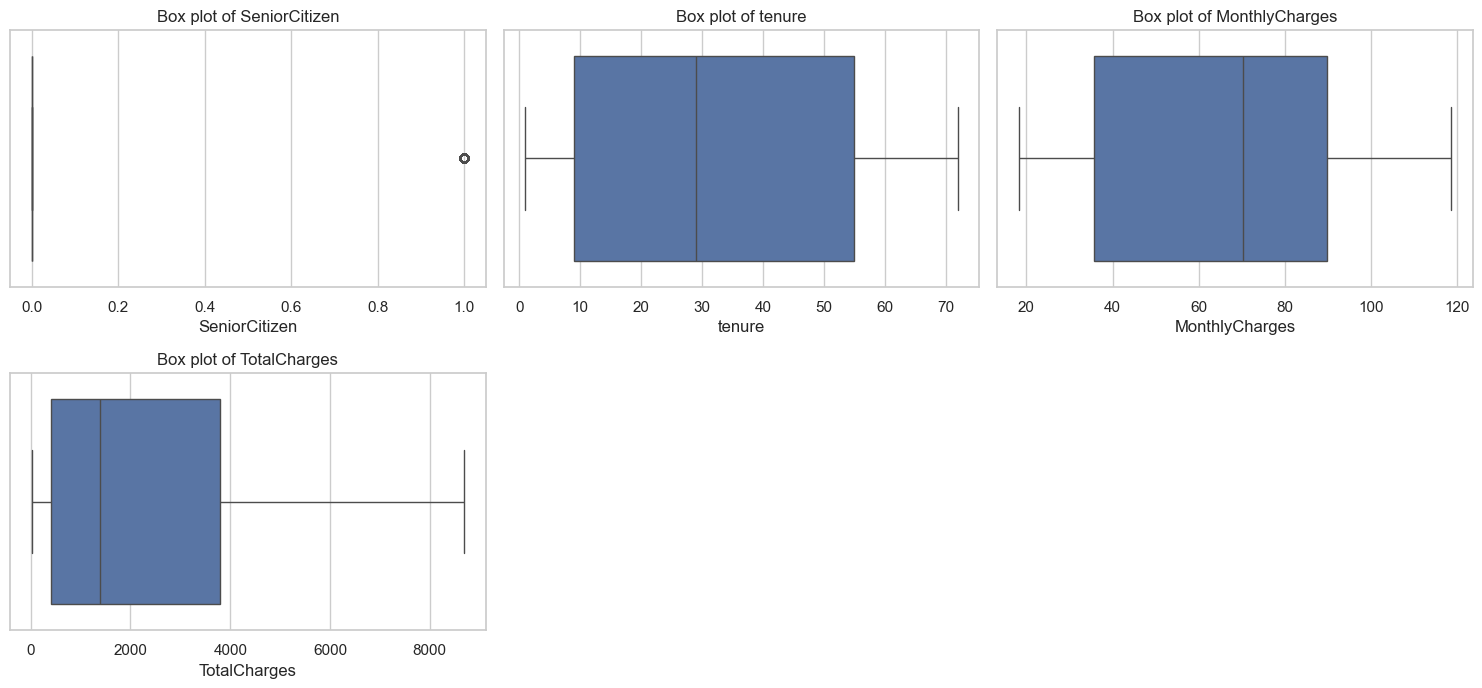

In [20]:
# 2. Box plots to identify outliers in numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(Numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

### The boxplot reveals that all data points lie within the whiskers, suggesting there are no outliers in this dataset. While the data distribution is right-skewed, it remains free from extreme values, indicating that all entries are within a reasonable range. This skewness shows a natural distribution pattern, with a higher concentration of values on the left and a gentle tapering off to the right, without any points significantly deviating from the main data spread.

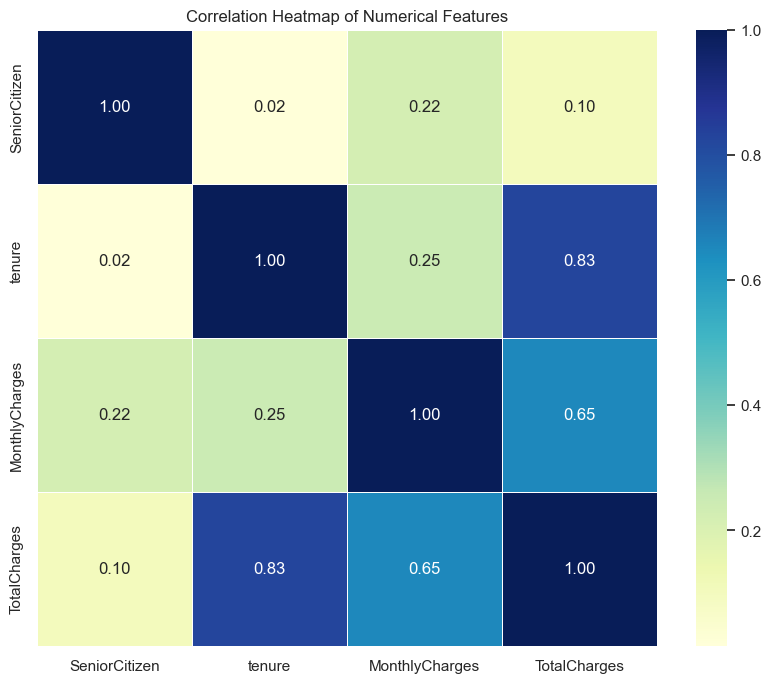

In [21]:
#  Heatmap for correlation between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Observations:
### Features with high correlations can sometimes be redundant, potentially impacting model interpretability and performance. TotalCharges and tenure are highly correlated, we might keep only one of them or combine them in some way.

### Principal Component Analysis (PCA) or other dimensionality reduction techniques can help reduce multicollinearity.

* Binning tenure into categories allows the model to better understand customer loyalty groups.
### New features:

* High Monthly Charges Indicator (high_monthly_charge): A binary feature to identify customers with high monthly charges, which may correlate with churn.

In [58]:

data['tenure_category'] = pd.qcut(data['tenure'], q=4, labels=['New', 'Short-term', 'Mid-term', 'Long-term'])

# Encode tenure_category as numeric
tenure_encoder = LabelEncoder()
data['tenure_category'] = tenure_encoder.fit_transform(data['tenure_category'])

# #  Monthly Charges to Total Charges Ratio
# # This feature captures the average monthly charge relative to total charges.
# data['charges_ratio'] = data['MonthlyCharges'] / (data['TotalCharges'])

# #  Senior Citizen and Monthly Charges Interaction
# # Higher charges might have different implications for senior citizens in terms of churn risk.
# data['senior_charges_interaction'] = data['SeniorCitizen'] * data['MonthlyCharges']

# #  Contract Type and Tenure Interaction
# # Interaction between contract type and tenure length - this might capture loyalty by contract.
# data['contract_tenure_interaction'] = data['Contract'] * data['tenure']

#  High Monthly Charges Indicator
# A binary indicator for high monthly charges, defined as above the 75th percentile.
high_charge_threshold = data['MonthlyCharges'].quantile(0.75)
data['high_monthly_charge'] = (data['MonthlyCharges'] > high_charge_threshold).astype(int)

data.drop(['tenure'], axis = 1, inplace = True)

# Display the new features
data[['tenure_category', 'high_monthly_charge']].head()


,tenure_category,high_monthly_charge
0,2,0
1,1,0
2,2,0
3,1,0
4,2,0


In [93]:
print(data['tenure_category'].value_counts())
print(data['high_monthly_charge'].value_counts())

tenure_category
2    1843
0    1755
1    1719
3    1715
Name: count, dtype: int64
high_monthly_charge
0    5274
1    1758
Name: count, dtype: int64


In [59]:
data['SeniorCitizen'].value_counts()
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

## Categorical Columns

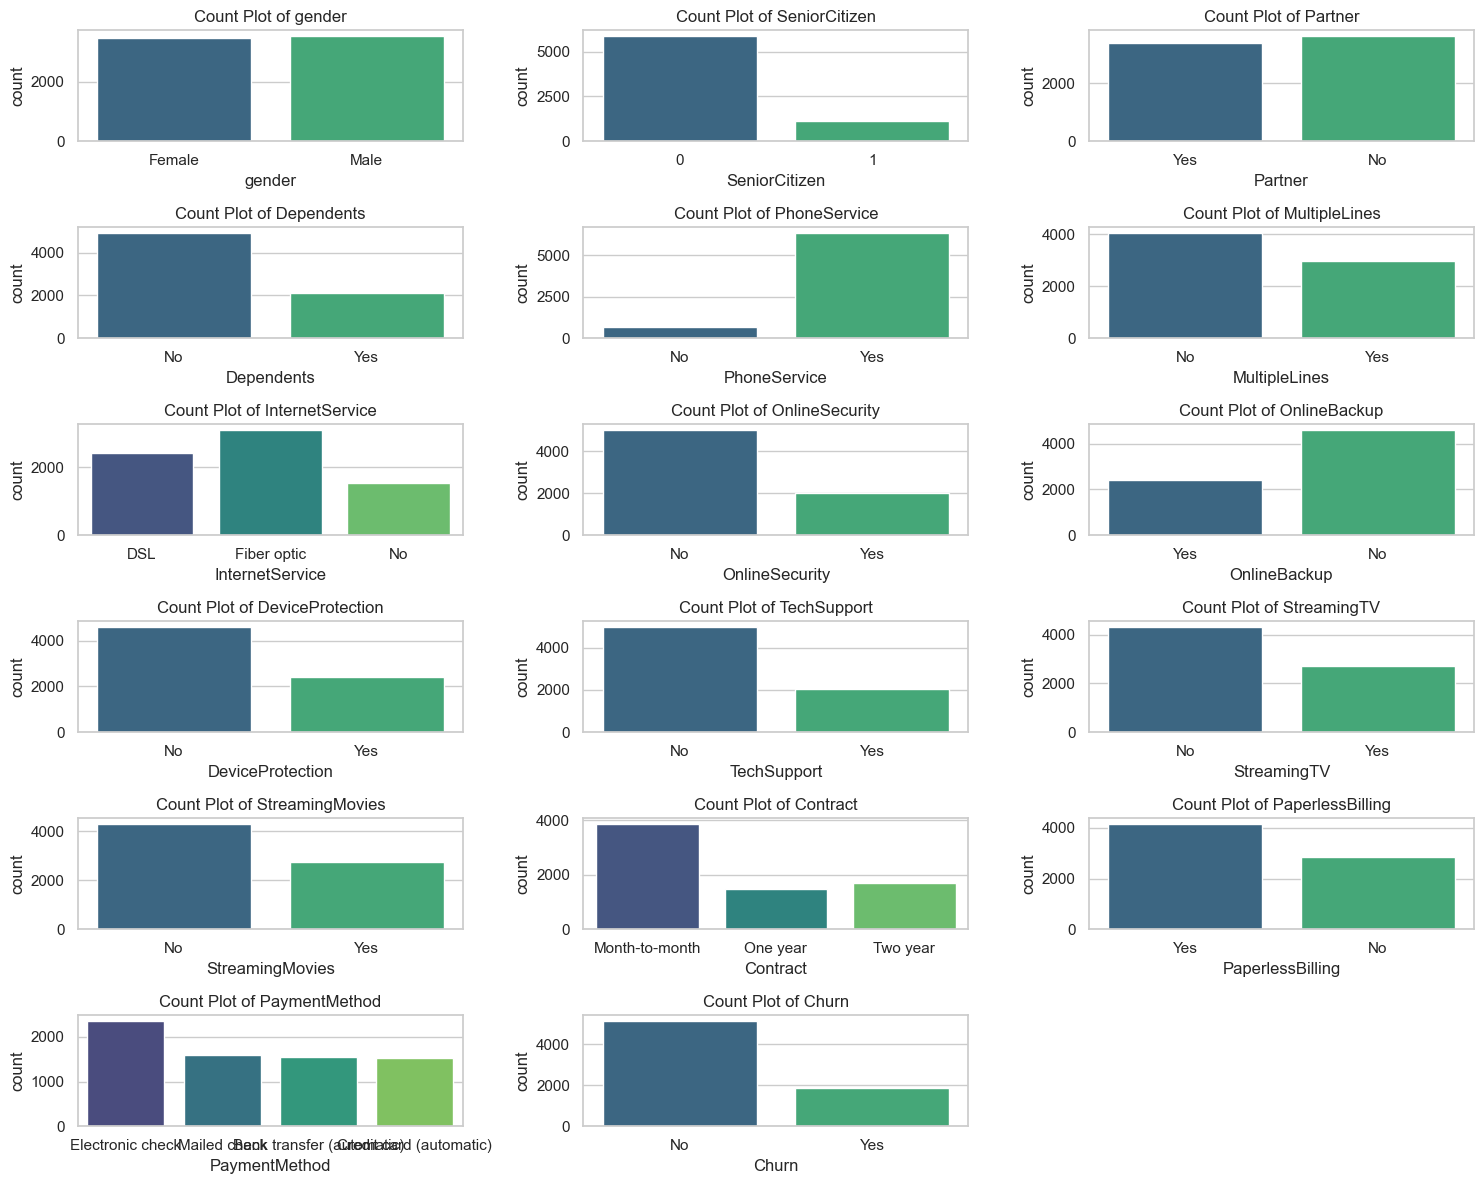

In [24]:
plt.figure(figsize=(15, 12))

Categorical_columns = data.select_dtypes(['object']).columns
# Adjust rows and columns based on the number of categorical columns
num_cols = len(Categorical_columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # This will calculate the required number of rows

for i, col in enumerate(Categorical_columns, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=data, palette="viridis")
    plt.title(f"Count Plot of {col}")
    plt.xticks()

plt.tight_layout()
plt.show()

In [60]:
Categorical_columns = data.select_dtypes('object').columns
Numerical_columns = data.select_dtypes(['int', 'float']).columns
print(Categorical_columns)
print(Numerical_columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Index(['MonthlyCharges', 'TotalCharges', 'tenure_category',
       'high_monthly_charge'],
      dtype='object')


## Encoding categorical columns
* ### We apply Ordinal Encoding for the columns because these are binary oridnal categorical variables.
* ### We apply One-Hot Encoding for the columns because these are nominal categorical variables.

In [61]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Adjusted column groups for encoding
binary_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines',  
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies',  'PaperlessBilling', 'Churn'
]
one_hot_encode_cols = ['InternetService','Contract', 'PaymentMethod', 'tenure_category']

# Define ColumnTransformer with OrdinalEncoder for binary columns and OneHotEncoder for nominal columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), one_hot_encode_cols),
        ('ordinal', OrdinalEncoder(), binary_cols)
    ],
    remainder='passthrough'
)

# Apply the ColumnTransformer
data_encoded = preprocessor.fit_transform(data)

# Get feature names from both transformers
one_hot_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out(one_hot_encode_cols)
binary_columns = binary_cols
numeric_columns = ['MonthlyCharges', 'TotalCharges', 'high_monthly_charge']

# Combining column names
final_columns_adjusted = list(one_hot_columns) + binary_columns + numeric_columns

# Create the final DataFrame with updated column names
data_encoded = pd.DataFrame(data_encoded, columns=final_columns_adjusted)

# Display the first few rows of the adjusted transformed DataFrame
data_encoded.head()


,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_category_0,tenure_category_1,tenure_category_2,tenure_category_3,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MonthlyCharges,TotalCharges,high_monthly_charge
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,29.85,29.85,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,53.85,108.15,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,70.70,151.65,0.0


## Splitting the data into training and testing sets

In [62]:
X = data_encoded.drop(['Churn'], axis=1)
y = data_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Scaling the data

In [63]:
scaler = StandardScaler()
X_train[['MonthlyCharges', 'TotalCharges', 'high_monthly_charge']] = scaler.fit_transform(X_train[['MonthlyCharges', 'TotalCharges', 'high_monthly_charge']])
X_test[['MonthlyCharges', 'TotalCharges', 'high_monthly_charge']] = scaler.transform(X_test[['MonthlyCharges', 'TotalCharges', 'high_monthly_charge']])


## Balancing the data

In [43]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [66]:
features = X_train.columns

## Feature Selection

In [68]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=15)
X_train_sm_rfe = rfe.fit_transform(X_train_sm, y_train_sm)
X_test_rfe = rfe.transform(X_test)
selected_features = X.columns[rfe.support_]

# Model Training
final_model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
final_model.fit(X_train_sm, y_train_sm)

# Predictions and Evaluation
y_pred = final_model.predict(X_test)
# print("Selected Features:", selected_features)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7555081734186212
Precision: 0.5307377049180327
Recall: 0.6925133689839572
F1 Score: 0.6009280742459396
AUC-ROC: 0.823524235004219
Confusion Matrix:
 [[804 229]
 [115 259]]


## Model Building

In [69]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train_sm_rfe, y_train_sm)

y_pred = rf.predict(X_test_rfe)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7427149964463398
Precision: 0.51171875
Recall: 0.7005347593582888


In [73]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
GB.fit(X_train_sm_rfe, y_train_sm)

y_pred = GB.predict(X_test_rfe)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7619047619047619
Precision: 0.5486284289276808
Recall: 0.5882352941176471


In [74]:
AB = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
AB.fit(X_train_sm_rfe, y_train_sm)

y_pred = AB.predict(X_test_rfe)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Get feature importances from the best random forest model

Accuracy: 0.7270788912579957
Precision: 0.49158249158249157
Recall: 0.7807486631016043
Confusion Matrix:
 [[731 302]
 [ 82 292]]


## Hyperparameter Tuning

In [77]:
param_grid = {
    'n_estimators': [ 200, 500],

    'max_depth': [ 20, 40, 80],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='f1')

# Fitting the model
grid_search.fit(X_train_sm_rfe, y_train_sm)

# Get best parameters and best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predicting on the test set
y_pred = best_rf_model.predict(X_test_rfe)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print('f1_score', f1_score(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Accuracy: 0.7640369580668088
Precision: 0.5522388059701493
Recall: 0.5935828877005348
f1_score 0.5721649484536082


<Axes: >

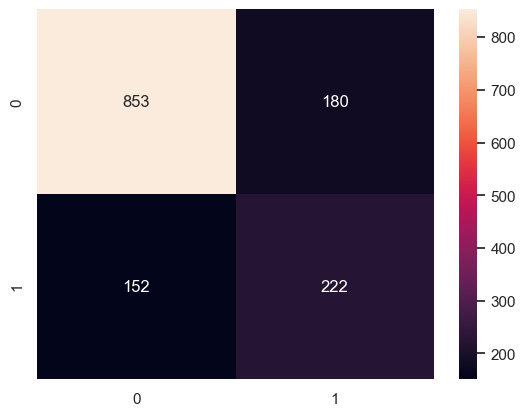

In [78]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [76]:
param_grid = {
    'n_estimators': [ 150, 300, 500],
    'learning_rate': [0.01, 0.1, ],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
}

gbc = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_sm, y_train_sm)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [30]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network architecture
class ChurnNN(nn.Module):
    def __init__(self, input_size):
        super(ChurnNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [31]:
input_size = X_train.shape[1]
model = ChurnNN(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch).squeeze()
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Display the average loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor).squeeze()
    y_test_pred = (y_test_pred >= 0.5).float()
    accuracy = (y_test_pred == y_test_tensor).float().mean()

accuracy.item()

Epoch [1/20], Loss: 0.4449
Epoch [2/20], Loss: 0.4222
Epoch [3/20], Loss: 0.4187
Epoch [4/20], Loss: 0.4143
Epoch [5/20], Loss: 0.4140
Epoch [6/20], Loss: 0.4111
Epoch [7/20], Loss: 0.4072
Epoch [8/20], Loss: 0.4067
Epoch [9/20], Loss: 0.4045
Epoch [10/20], Loss: 0.4020
Epoch [11/20], Loss: 0.3965
Epoch [12/20], Loss: 0.3947
Epoch [13/20], Loss: 0.3933
Epoch [14/20], Loss: 0.3885
Epoch [15/20], Loss: 0.3868
Epoch [16/20], Loss: 0.3832
Epoch [17/20], Loss: 0.3803
Epoch [18/20], Loss: 0.3763
Epoch [19/20], Loss: 0.3701
Epoch [20/20], Loss: 0.3663


0.7754086852073669

In [33]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 455 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 14.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [34]:
import shap

In [79]:
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test_rfe)
print("SHAP values shape:", np.array(shap_values).shape)
print("X_test shape:", X_test.shape)




SHAP values shape: (1407, 15, 2)
X_test shape: (1407, 30)


In [82]:
selected_features

Index(['InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'tenure_category_0', 'tenure_category_2', 'Dependents', 'PhoneService',
       'OnlineSecurity', 'TechSupport', 'StreamingMovies', 'PaperlessBilling'],
      dtype='object')

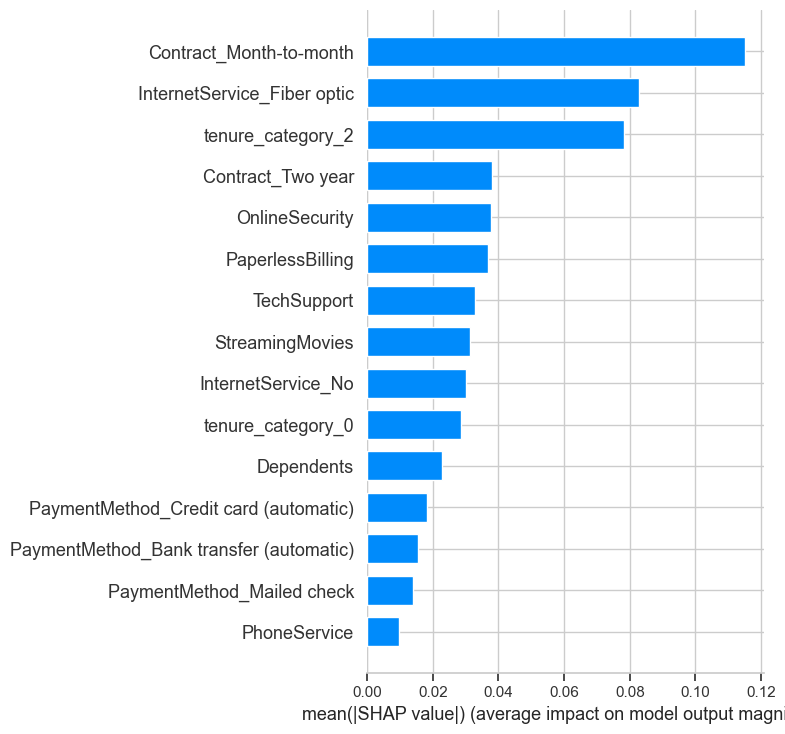

In [85]:
# Ensure X_test is a DataFrame with column names
if not isinstance(X_test_rfe, pd.DataFrame):
    X_test_rfe = pd.DataFrame(X_test_rfe, columns=selected_features)

# Select SHAP values for the positive class (Churn = 1)
shap_values_churn = shap_values[:, :, 1]

# Plot the summary with feature names
shap.summary_plot(shap_values_churn, X_test_rfe, plot_type="bar")


### Explanation of the Most Important Features Contributing to Predictions

Using SHAP values, we can identify and rank the features that have the most significant impact on predicting customer churn. Here are the top contributors:

1. **Contract (Month-to-month)**: Customers with month-to-month contracts are more likely to churn, likely due to the flexibility to cancel anytime without a long-term commitment.
   
2. **InternetService (Fiber optic)**: Customers using fiber optic internet tend to have a higher churn rate, possibly due to service issues or higher costs compared to other options.

3. **Tenure Category (2)**: Customers with medium-length tenure (possibly 1-2 years) are more prone to churn than those with longer or very short tenures. This may be because they’re beyond the initial commitment phase but haven’t developed long-term loyalty.

4. **Contract (Two year)**: A two-year contract correlates with lower churn, indicating that long-term commitments may increase customer retention.

5. **OnlineSecurity**: Lack of online security service is linked with higher churn, suggesting that customers value security features and may leave if these aren’t available.

6. **PaperlessBilling**: Paperless billing is associated with higher churn, which could indicate that these customers may prefer digital interactions or could be more tech-savvy and price-sensitive.

7. **TechSupport**: Absence of tech support is associated with increased churn, indicating that accessible support may improve customer satisfaction and retention.

### Suggested Business Actions to Reduce Customer Churn

1. **Promote Long-Term Contracts**: Encourage customers on month-to-month contracts to switch to one-year or two-year contracts by offering discounts or benefits, as longer contracts correlate with lower churn.

2. **Enhance Internet Service Quality**: Address any issues with fiber optic service quality or pricing, as dissatisfaction here could be driving customers away. Consider pricing adjustments or enhanced support for fiber optic users.

3. **Increase Engagement with Medium-Tenure Customers**: Implement loyalty programs or special offers targeting customers who have been with the company for 1-2 years to foster long-term loyalty before they reach the high-churn period.

4. **Bundle Online Security and Tech Support**: Offer affordable bundles that include online security and tech support services, as the presence of these services appears to reduce churn.

5. **Paperless Billing Incentives**: Since customers with paperless billing may be more price-sensitive, offer small discounts or rewards for choosing this option, or introduce special promotions for digital users to enhance engagement and retention.

These actions are based on the SHAP value analysis, which highlights key factors driving churn. Tailoring business strategies to address these factors can help the company proactively reduce customer attrition.

In [49]:
import joblib

In [53]:
x_test = pd.DataFrame(X_test_rfe)

In [54]:
x_test.to_csv("x_test")

In [50]:
joblib.dump(final_model, "model.pkl")

['model.pkl']

In [32]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)
}

## Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }


In [33]:
pd.DataFrame(results)

,Logistic Regression,Random Forest,XGBoost,Neural Network
Accuracy,0.784648,0.785359,0.777541,0.743426
Precision,0.628159,0.624138,0.599349,0.516883
Recall,0.465241,0.483957,0.491979,0.532086
F1 Score,0.534562,0.545181,0.540382,0.524374
AUC-ROC,0.823545,0.808286,0.811835,0.758072
Confusion Matrix,"[[930, 103], [200, 174]]","[[924, 109], [193, 181]]","[[910, 123], [190, 184]]","[[847, 186], [175, 199]]"
